In [ ]:
#ENVIRONMENT SETUP

In [2]:
!pip install wordcloud
import re
import pickle
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

In [7]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
#LOADING THE DATASET

DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv(r'C:\Users\nbuna\Downloads\Project_Dataset.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset = dataset[['sentiment','text']]
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

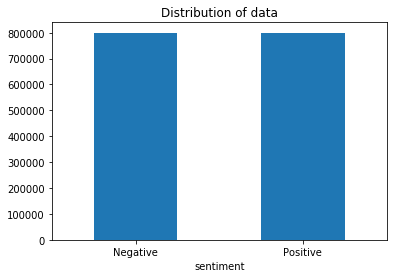

In [9]:
#plotting distribution of dependent values i.e. sentiment 

ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [11]:
#NLP PREPROCESSING

In [12]:
#defining stopwords

stopwordslist=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", 
               "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", 
               "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", 
               "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", 
               "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", 
               "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", 
               "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", 
               "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", 
               "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", 
               "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", 
               "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", 
               "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", 
               "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings",
               "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", 
               "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
               "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", 
               "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc",
               "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", 
               "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning",
               "consequently", "consider", "considering", "contain", "containing", "contains", 
               "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr",
               "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", 
               "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", 
               "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", 
               "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", 
               "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec",
               "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el",
               "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", 
               "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", 
               "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere",
               "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", 
               "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj",
               "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly",
               "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", 
               "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", 
               "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", 
               "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", 
               "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", 
               "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here",
               "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself",
               "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home",
               "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", 
               "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", 
               "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", 
               "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", 
               "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", 
               "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", 
               "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", 
               "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", 
               "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later",
               "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", 
               "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", 
               "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", 
               "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", 
               "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", 
               "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", 
               "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", 
               "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", 
               "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", 
               "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", 
               "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", 
               "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", 
               "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", 
               "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", 
               "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall",
               "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par",
               "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", 
               "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", 
               "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", 
               "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", 
               "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", 
               "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent",
               "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively",
               "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", 
               "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", 
               "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", 
               "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", 
               "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", 
               "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", 
               "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", 
               "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", 
               "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", 
               "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", 
               "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", 
               "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", 
               "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", 
               "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", 
               "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", 
               "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", 
               "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", 
               "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're",
               "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", 
               "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
               "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", 
               "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", 
               "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", 
               "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", 
               "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", 
               "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", 
               "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", 
               "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", 
               "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", 
               "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", 
               "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", 
               "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", 
               "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", 
               "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", 
               "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", 
               "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", 
               "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves",
               "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]


In [1]:
#CREATING FUNCTION TO PERFORM BASIC PREPROCESSING FOR THE DATASET, including: 
    # replacing URL links with "URL"
    # substituting mentions with "USER"
    # removing non-alphabetic characters 
    # shortening repeating letters with two of the same letter
    # removing stopwords defined above
    # processing Lemmatization and Stemming
    
def preprocess(textdata):
    processedText = []
    
    # defining regex and lemmatizer
    wordLemm = WordNetLemmatizer()
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet) 
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if word not in stopwordslist:
                if len(word)>1:
                    word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [14]:
# applying function on the dataset

processedtext = preprocess(text)

In [ ]:
#WORDCLOUD

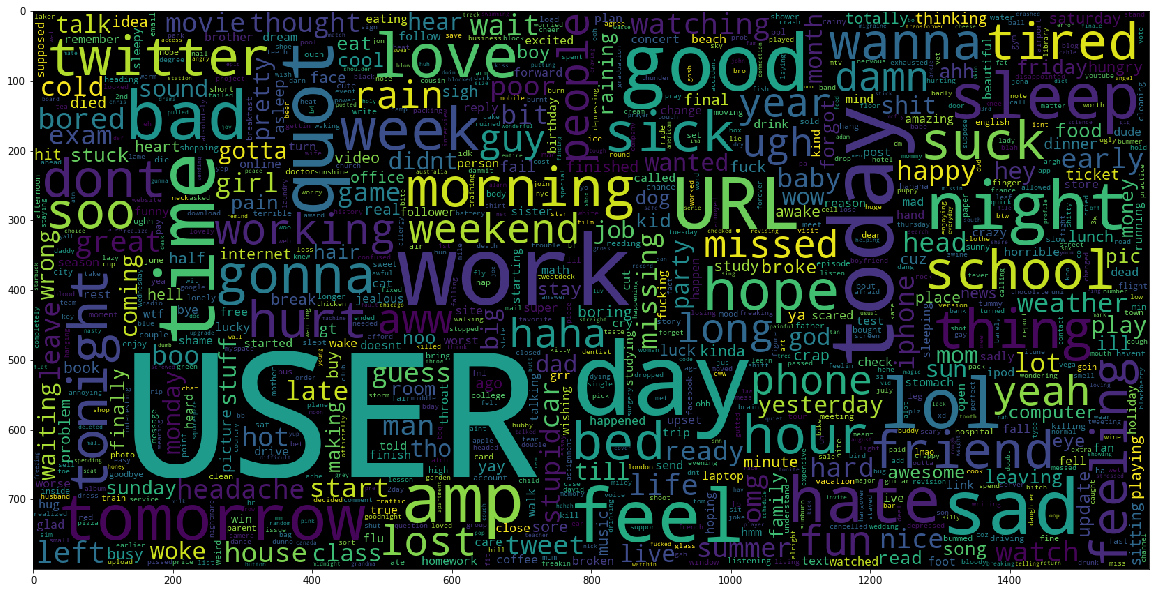

In [15]:
#Word Cloud for Negative tweets 

data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

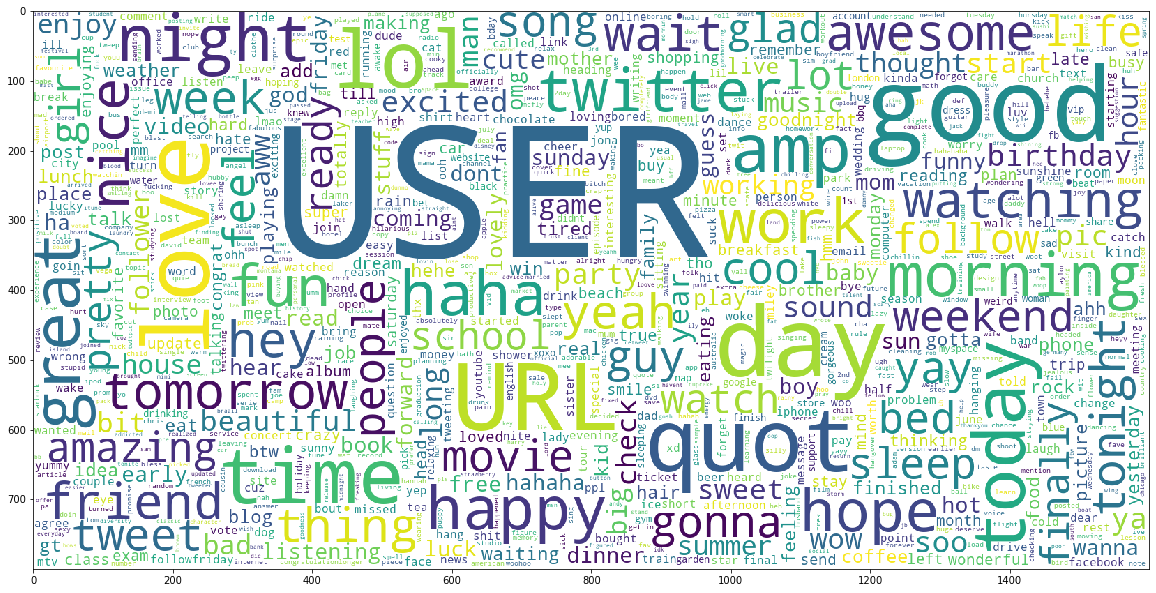

In [16]:
#Word Cloud for Positive tweets 

data_pos = processedtext[800000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False,background_color='white').generate(" ".join(data_pos))
plt.imshow(wc)

In [18]:
#SPLITTING DATA TO TRAINING AND TEST SETS 
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)

In [20]:
#APPLYING TF-IDF VECTORISER

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [22]:
#TRANSFORMING THE DATASET

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [24]:
#EVALUATION FUNCTION to visualize the results of algorithms 

def model_Evaluate(model):    
    # Predicting values using test dataset
    y_pred = model.predict(X_test)

    # Printing the matrics
    print(classification_report(y_test, y_pred))
    
    # Plotting Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [25]:
#NAIVE BAYES 

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     39989
           1       0.74      0.77      0.76     40011

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



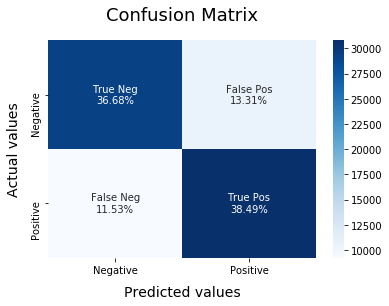

In [26]:
#Bernoulli NAIVE BAYES 
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     39989
           1       0.74      0.78      0.76     40011

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



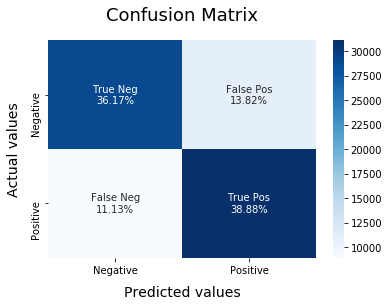

In [37]:
#Multinomial NAIVE BAYES 
from sklearn.naive_bayes import MultinomialNB
Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(X_train, y_train)
model_Evaluate(Naive_Bayes)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     39989
           1       0.74      0.78      0.76     40011

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



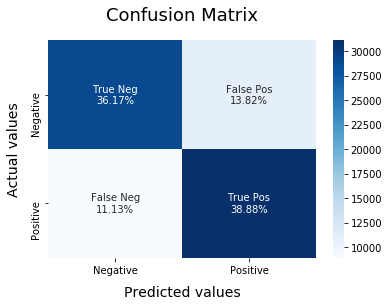

In [38]:
#Gaussian NAIVE BAYES 
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(X_train, y_train)
model_Evaluate(Naive_Bayes)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     39989
           1       0.74      0.78      0.76     40011

    accuracy                           0.75     80000
   macro avg       0.75      0.75      0.75     80000
weighted avg       0.75      0.75      0.75     80000



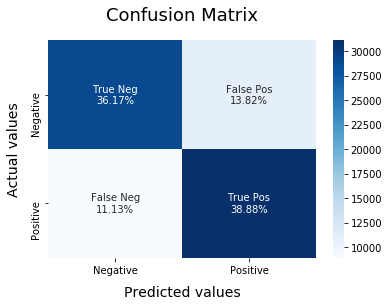

In [39]:
#Categorical NAIVE BAYES 
from sklearn.naive_bayes import CategoricalNB
Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(X_train, y_train)
model_Evaluate(Naive_Bayes)

In [ ]:
#LOGISTIC REGRESSION

C:\Users\nbuna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.78      0.73      0.75     39989
           1       0.75      0.79      0.77     40011

    accuracy                           0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000



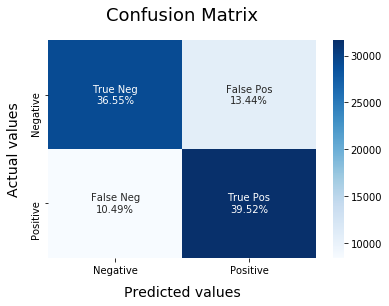

In [40]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression(random_state=0).fit(X_train, y_train)
model_Evaluate(Logistic_Regression)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     39989
           1       0.75      0.79      0.77     40011

    accuracy                           0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000



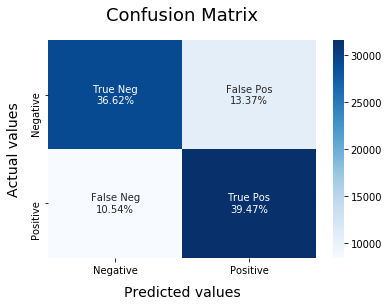

In [42]:
Logistic_Regression2 = LogisticRegression(solver='saga', max_iter=1000000).fit(X_train, y_train)
model_Evaluate(Logistic_Regression2)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75     39989
           1       0.75      0.79      0.77     40011

    accuracy                           0.76     80000
   macro avg       0.76      0.76      0.76     80000
weighted avg       0.76      0.76      0.76     80000



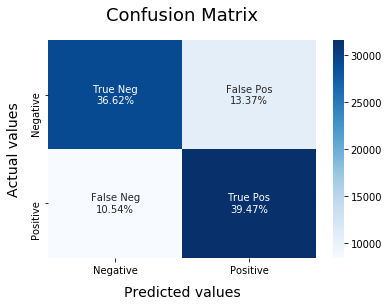

In [46]:
Logistic_Regression3 = LogisticRegression(solver='sag', max_iter=1000000).fit(X_train, y_train)
model_Evaluate(Logistic_Regression3)

In [ ]:
#RANDOM FOREST 
   #Technical difficulties, the alforithm did not finilize due to computational capacity 

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
Random_Forest = RandomForestClassifier(n_estimators=200, random_state=0)
Random_Forest.fit(X_train, y_train)
model_Evaluate(Random_Forest)

KeyboardInterrupt: 